In [109]:
import pandas as pd

In [110]:
df = pd.read_csv('/Users/daniilfenev/Desktop/УЧЕБА/Датасеты с кагла/Zomato Restaurants Dataset/zomato.csv')

In [111]:
df.head(10)

,Unnamed: 0.1,Unnamed: 0,restaurant name,restaurant type,rate (out of 5),num of ratings,avg cost (two people),online_order,table booking,cuisines type,area,local address
0,0,0,#FeelTheROLL,Quick Bites,3.4,7,200.0,No,No,Fast Food,Bellandur,Bellandur
1,1,1,#L-81 Cafe,Quick Bites,3.9,48,400.0,Yes,No,"Fast Food, Beverages","Byresandra,Tavarekere,Madiwala",HSR
2,2,2,#refuel,Cafe,3.7,37,400.0,Yes,No,"Cafe, Beverages",Bannerghatta Road,Bannerghatta Road
3,3,3,'@ Biryani Central,Casual Dining,2.7,135,550.0,Yes,No,"Biryani, Mughlai, Chinese",Marathahalli,Marathahalli
4,4,4,'@ The Bbq,Casual Dining,2.8,40,700.0,Yes,No,"BBQ, Continental, North Indian, Chinese, Bever...",Bellandur,Bellandur
5,5,5,'@99,"Takeaway, Delivery",3.4,37,200.0,No,No,"Mughlai, Biryani, Chinese, North Indian",Whitefield,Whitefield
6,6,6,'@Italy,Casual Dining,4.1,305,700.0,Yes,No,Italian,Banashankari,Kumaraswamy Layout
7,7,7,'@North Parontha Hut,"Takeaway, Delivery",2.8,40,300.0,No,No,North Indian,Indiranagar,Old Airport Road
8,8,8,1000 B.C,Quick Bites,3.2,49,300.0,Yes,No,"Arabian, Sandwich, Rolls, Burger","Byresandra,Tavarekere,Madiwala",Koramangala 5th Block
9,9,9,100ÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂ°C,Casual Dining,3.7,41,450.0,No,No,"Biryani, North Indian","Byresandra,Tavarekere,Madiwala",BTM


In [112]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7105 entries, 0 to 7104
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0.1           7105 non-null   int64  
 1   Unnamed: 0             7105 non-null   int64  
 2   restaurant name        7105 non-null   object 
 3   restaurant type        7105 non-null   object 
 4   rate (out of 5)        7037 non-null   float64
 5   num of ratings         7105 non-null   int64  
 6   avg cost (two people)  7048 non-null   float64
 7   online_order           7105 non-null   object 
 8   table booking          7105 non-null   object 
 9   cuisines type          7105 non-null   object 
 10  area                   7105 non-null   object 
 11  local address          7105 non-null   object 
dtypes: float64(2), int64(3), object(7)
memory usage: 666.2+ KB


In [113]:
df.shape

(7105, 12)

In [114]:
df.columns

Index(['Unnamed: 0.1', 'Unnamed: 0', 'restaurant name', 'restaurant type',
       'rate (out of 5)', 'num of ratings', 'avg cost (two people)',
       'online_order', 'table booking', 'cuisines type', 'area',
       'local address'],
      dtype='object')

In [115]:
df.isnull().sum()

Unnamed: 0.1              0
Unnamed: 0                0
restaurant name           0
restaurant type           0
rate (out of 5)          68
num of ratings            0
avg cost (two people)    57
online_order              0
table booking             0
cuisines type             0
area                      0
local address             0
dtype: int64

In [116]:
print(df['rate (out of 5)'].isnull().sum() * 100/len(df))
print(df['avg cost (two people)'].isnull().sum() * 100/len(df))

0.9570724841660803
0.8022519352568613


Удалим первые две колонки, так как они не несут никакой важной для нас информации

In [117]:
df.drop(columns='Unnamed: 0.1', inplace=True)
df.drop(columns='Unnamed: 0', inplace=True)

In [118]:
df.columns

Index(['restaurant name', 'restaurant type', 'rate (out of 5)',
       'num of ratings', 'avg cost (two people)', 'online_order',
       'table booking', 'cuisines type', 'area', 'local address'],
      dtype='object')

In [119]:
df.head()

,restaurant name,restaurant type,rate (out of 5),num of ratings,avg cost (two people),online_order,table booking,cuisines type,area,local address
0,#FeelTheROLL,Quick Bites,3.4,7,200.0,No,No,Fast Food,Bellandur,Bellandur
1,#L-81 Cafe,Quick Bites,3.9,48,400.0,Yes,No,"Fast Food, Beverages","Byresandra,Tavarekere,Madiwala",HSR
2,#refuel,Cafe,3.7,37,400.0,Yes,No,"Cafe, Beverages",Bannerghatta Road,Bannerghatta Road
3,'@ Biryani Central,Casual Dining,2.7,135,550.0,Yes,No,"Biryani, Mughlai, Chinese",Marathahalli,Marathahalli
4,'@ The Bbq,Casual Dining,2.8,40,700.0,Yes,No,"BBQ, Continental, North Indian, Chinese, Bever...",Bellandur,Bellandur


Приведем текстовые формат в столбцах "Возможность онлайн заказа" и "бронирование столов" к булевым значениям

In [120]:
dict1 = {'Yes' : True,
         'No' : False
        }

In [121]:
df['online_order']  = df['online_order'].map(dict1).astype('boolean')
df['table booking'] = df['table booking'].map(dict1).astype('boolean')

In [122]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7105 entries, 0 to 7104
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   restaurant name        7105 non-null   object 
 1   restaurant type        7105 non-null   object 
 2   rate (out of 5)        7037 non-null   float64
 3   num of ratings         7105 non-null   int64  
 4   avg cost (two people)  7048 non-null   float64
 5   online_order           7105 non-null   boolean
 6   table booking          7105 non-null   boolean
 7   cuisines type          7105 non-null   object 
 8   area                   7105 non-null   object 
 9   local address          7105 non-null   object 
dtypes: boolean(2), float64(2), int64(1), object(5)
memory usage: 471.9+ KB


In [123]:
df.head()

,restaurant name,restaurant type,rate (out of 5),num of ratings,avg cost (two people),online_order,table booking,cuisines type,area,local address
0,#FeelTheROLL,Quick Bites,3.4,7,200.0,False,False,Fast Food,Bellandur,Bellandur
1,#L-81 Cafe,Quick Bites,3.9,48,400.0,True,False,"Fast Food, Beverages","Byresandra,Tavarekere,Madiwala",HSR
2,#refuel,Cafe,3.7,37,400.0,True,False,"Cafe, Beverages",Bannerghatta Road,Bannerghatta Road
3,'@ Biryani Central,Casual Dining,2.7,135,550.0,True,False,"Biryani, Mughlai, Chinese",Marathahalli,Marathahalli
4,'@ The Bbq,Casual Dining,2.8,40,700.0,True,False,"BBQ, Continental, North Indian, Chinese, Bever...",Bellandur,Bellandur


In [124]:
# 1) Берём нужные колонки и убираем пропуски по цене
tmp = df[['restaurant type', 'avg cost (two people)']].dropna(subset=['avg cost (two people)']).copy()

# 2) Разбиваем типы по запятой и раскладываем по строкам
tmp['type'] = tmp['restaurant type'].astype('string').str.split(r'\s*,\s*')
tmp = tmp.explode('type', ignore_index=True)

# 3) Чистим и убираем пустые/NaN
tmp['type'] = tmp['type'].str.strip()
tmp = tmp.dropna(subset=['type'])
tmp = tmp[tmp['type'] != '']

# 4) Средняя стоимость по типу
mean_by_type = (
    tmp.groupby('type', as_index=False)['avg cost (two people)']
       .mean()
       .round(0)
       .rename(columns={'type': 'restaurant type',
                        'avg cost (two people)': 'mean_cost_for_two'})
       .sort_values('mean_cost_for_two', ascending=False)
)
mean_by_type

,restaurant type,mean_cost_for_two
11,Fine Dining,2797.0
6,Club,2017.0
16,Lounge,1787.0
19,Microbrewery,1650.0
20,Pub,1318.0
14,Irani Cafee,1300.0
1,Bar,1299.0
5,Casual Dining,823.0
7,Confectionery,650.0
4,Cafe,624.0


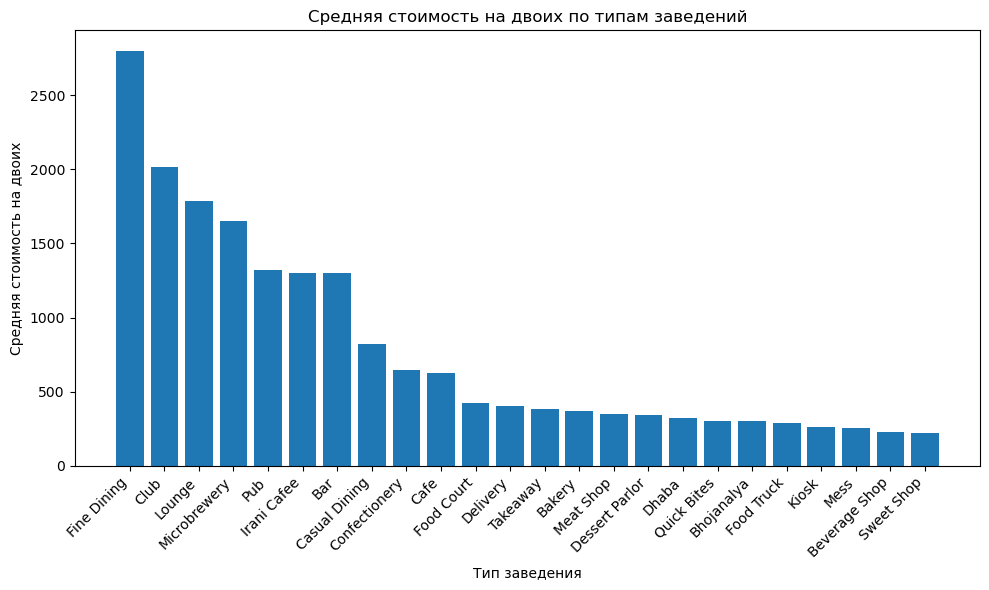

In [125]:
import matplotlib.pyplot as plt

data = mean_by_type.sort_values('mean_cost_for_two', ascending=False)

plt.figure(figsize=(10, 6))
plt.bar(data['restaurant type'], data['mean_cost_for_two'])
plt.xlabel('Тип заведения')
plt.ylabel('Средняя стоимость на двоих')
plt.title('Средняя стоимость на двоих по типам заведений')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Тут спросил у чатаГпт, какая диаграмма сюда могла подойти лучше, здесь как я понимаю, видны средняя, основной диапазон цен и некоторые выбросы

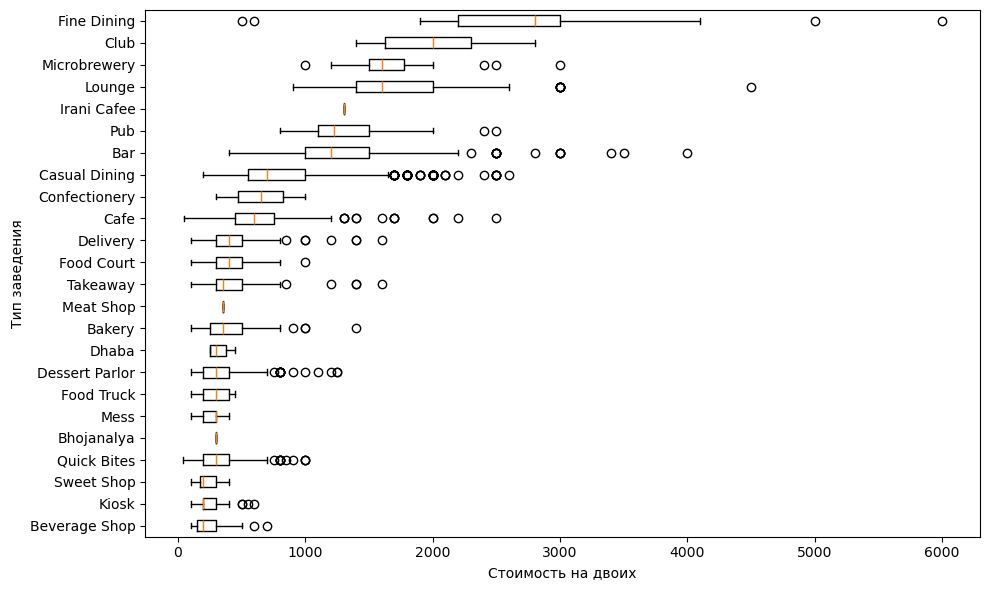

In [126]:
order = (tmp.groupby('type')['avg cost (two people)']
           .median().sort_values(ascending=True).index)
data = [tmp.loc[tmp['type']==t, 'avg cost (two people)'] for t in order]

plt.figure(figsize=(10, 6))
plt.boxplot(data, vert=False, labels=order)
plt.xlabel('Стоимость на двоих'); plt.ylabel('Тип заведения')
plt.tight_layout(); plt.show()

In [127]:
df.head(20)

,restaurant name,restaurant type,rate (out of 5),num of ratings,avg cost (two people),online_order,table booking,cuisines type,area,local address
0,#FeelTheROLL,Quick Bites,3.4,7,200.0,False,False,Fast Food,Bellandur,Bellandur
1,#L-81 Cafe,Quick Bites,3.9,48,400.0,True,False,"Fast Food, Beverages","Byresandra,Tavarekere,Madiwala",HSR
2,#refuel,Cafe,3.7,37,400.0,True,False,"Cafe, Beverages",Bannerghatta Road,Bannerghatta Road
3,'@ Biryani Central,Casual Dining,2.7,135,550.0,True,False,"Biryani, Mughlai, Chinese",Marathahalli,Marathahalli
4,'@ The Bbq,Casual Dining,2.8,40,700.0,True,False,"BBQ, Continental, North Indian, Chinese, Bever...",Bellandur,Bellandur
5,'@99,"Takeaway, Delivery",3.4,37,200.0,False,False,"Mughlai, Biryani, Chinese, North Indian",Whitefield,Whitefield
6,'@Italy,Casual Dining,4.1,305,700.0,True,False,Italian,Banashankari,Kumaraswamy Layout
7,'@North Parontha Hut,"Takeaway, Delivery",2.8,40,300.0,False,False,North Indian,Indiranagar,Old Airport Road
8,1000 B.C,Quick Bites,3.2,49,300.0,True,False,"Arabian, Sandwich, Rolls, Burger","Byresandra,Tavarekere,Madiwala",Koramangala 5th Block
9,100ÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂ°C,Casual Dining,3.7,41,450.0,False,False,"Biryani, North Indian","Byresandra,Tavarekere,Madiwala",BTM


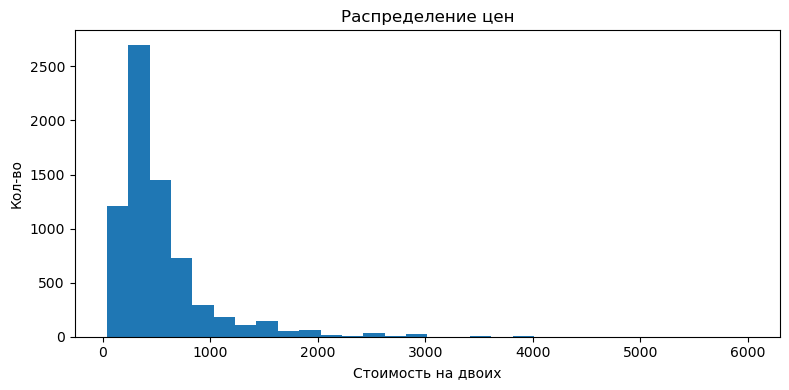

In [140]:
s = df['avg cost (two people)'].dropna()
plt.figure(figsize=(8,4))
plt.hist(s, bins=30)
plt.xlabel('Стоимость на двоих'); plt.ylabel('Кол-во'); plt.title('Распределение цен'); plt.tight_layout(); plt.show()

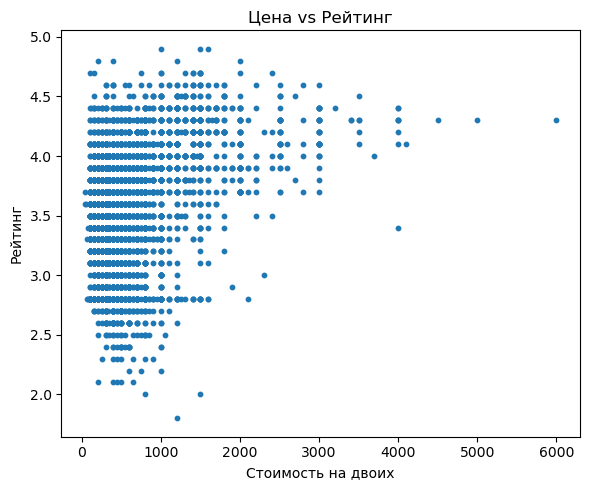

Корреляция (Пирсон): 0.376


In [141]:
d = df[['avg cost (two people)', 'rate (out of 5)']].dropna()
plt.figure(figsize=(6,5))
plt.scatter(d['avg cost (two people)'], d['rate (out of 5)'], s=10)
plt.xlabel('Стоимость на двоих'); plt.ylabel('Рейтинг'); plt.title('Цена vs Рейтинг'); plt.tight_layout(); plt.show()

corr = d.corr(numeric_only=True).loc['avg cost (two people)', 'rate (out of 5)']
print('Корреляция (Пирсон):', round(corr, 3))

In [142]:
res_flags = (df.groupby('online_order')[['avg cost (two people)', 'rate (out of 5)']]
               .median().rename_axis('online_order').add_suffix(' (median)'))
print(res_flags)

res_booking = (df.groupby('table booking')[['avg cost (two people)', 'rate (out of 5)']]
                 .median().rename_axis('table_booking').add_suffix(' (median)'))
print(res_booking)

              avg cost (two people) (median)  rate (out of 5) (median)
online_order                                                          
False                                  400.0                       3.5
True                                   400.0                       3.6
               avg cost (two people) (median)  rate (out of 5) (median)
table_booking                                                          
False                                   400.0                       3.5
True                                   1200.0                       4.1


In [143]:
area_med = (df.groupby('area')['avg cost (two people)']
              .median().sort_values(ascending=False))
print('Топ дорогих районов:\n', area_med.head(10))
print('Топ дешёвых районов:\n', area_med.tail(10))

Топ дорогих районов:
 area
Brigade Road        600.0
Lavelle Road        550.0
Whitefield          500.0
Church Street       450.0
MG Road             450.0
Indiranagar         450.0
Kalyan Nagar        400.0
Sarjapur Road       400.0
Residency Road      400.0
Old Airport Road    400.0
Name: avg cost (two people), dtype: float64
Топ дешёвых районов:
 area
Brookefield              400.0
Bellandur                400.0
Koramangala 6th Block    375.0
New BEL Road             325.0
JP Nagar                 300.0
Koramangala 5th Block    300.0
Koramangala 7th Block    300.0
Rajajinagar              300.0
Basavanagudi             300.0
Banashankari             300.0
Name: avg cost (two people), dtype: float64


In [147]:
cuis = (df['cuisines type'].astype('string').str.split(r'\s*,\s*')
          .explode().str.strip())
cuis = cuis[cuis.notna() & (cuis!='')]

top_cuisines = cuis.value_counts()
print(top_cuisines.head(15))

rating_by_cuisine = (df[['rate (out of 5)','cuisines type']]
    .assign(cuis=lambda x: x['cuisines type'].astype('string').str.split(r'\s*,\s*'))
    .explode('cuis').dropna(subset=['cuis'])
    .assign(cuis=lambda x: x['cuis'].str.strip())
    .groupby('cuis', as_index=True)['rate (out of 5)'].mean()
    .round(2)
    .sort_values(ascending=False).head(15))
print(rating_by_cuisine)

cuisines type
North Indian    3237
Chinese         2438
South Indian    1464
Fast Food       1037
Biryani          929
Continental      738
Desserts         543
Beverages        533
Cafe             519
Street Food      394
Italian          383
Bakery           304
Andhra           292
Seafood          266
Mughlai          234
Name: count, dtype: int64
cuis
Cantonese        4.60
African          4.50
Singaporean      4.36
Vegan            4.30
Jewish           4.30
Belgian          4.30
German           4.25
British          4.25
Russian          4.20
Sindhi           4.20
Sri Lankan       4.20
Modern Indian    4.19
Malaysian        4.19
Burmese          4.19
Parsi            4.15
Name: rate (out of 5), dtype: float64


In [148]:
import numpy as np
df2 = df.copy()
df2 = df2[df2['rate (out of 5)'].notna() & df2['num of ratings'].notna()]
C = df2['rate (out of 5)'].mean()                   # средний рейтинг по датасету
m = int(df2['num of ratings'].quantile(0.75))       # порог "доверия" по кол-ву оценок
v = df2['num of ratings']; R = df2['rate (out of 5)']
df2['bayes_score'] = (v/(v+m))*R + (m/(v+m))*C

leaders = (df2.sort_values('bayes_score', ascending=False)
             [['restaurant name','local address','num of ratings','rate (out of 5)','bayes_score']].head(20))
leaders

,restaurant name,local address,num of ratings,rate (out of 5),bayes_score
1035,Byg Brewski Brewing Company,Sarjapur Road,16345,4.9,4.889149
466,Asia Kitchen By Mainland China,Koramangala 5th Block,2178,4.9,4.822514
6496,The Pizza Bakery,Indiranagar,1724,4.8,4.710490
6665,Toit,Indiranagar,14956,4.7,4.689860
6242,The Black Pearl,Koramangala 5th Block,10413,4.7,4.685490
2149,Flechazo,Marathahalli,7154,4.7,4.678997
757,Biergarten,Whitefield,6865,4.7,4.678130
6140,TBC Sky Lounge,HSR,6745,4.7,4.677748
4444,O.G. Variar & Sons,Rajajinagar,1156,4.8,4.670925
1631,CTR,Malleshwaram,4408,4.7,4.666286


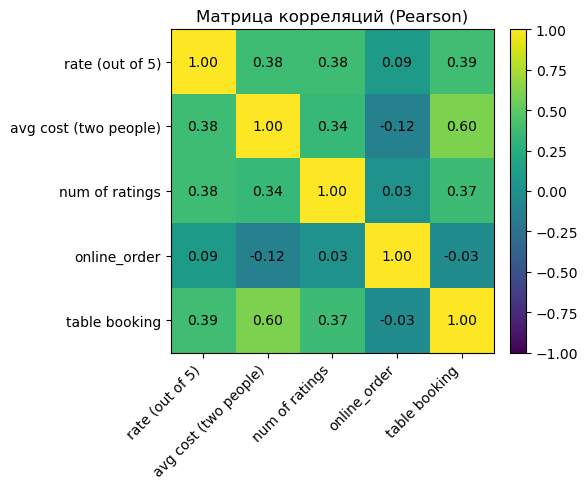

In [152]:
# выберем базовые признаки
cols = ['rate (out of 5)', 'avg cost (two people)', 'num of ratings',
        'online_order', 'table booking']
X = df[cols].copy()

# булевы флаги → 0/1 (сохраним NA, если есть)
for col in ['online_order', 'table booking']:
    X[col] = X[col].astype('boolean').astype('Int64')

# корреляции
corr = X.corr(numeric_only=True, method='pearson')

# heatmap без seaborn
plt.figure(figsize=(6,5))
im = plt.imshow(corr.values, vmin=-1, vmax=1)


im = plt.imshow(corr.values, vmin=-1, vmax=1)
plt.colorbar(im, fraction=0.046, pad=0.04)
plt.xticks(range(len(corr.columns)), corr.columns, rotation=45, ha='right')
plt.yticks(range(len(corr.index)), corr.index)
plt.title('Матрица корреляций (Pearson)')

for i in range(corr.shape[0]):
    for j in range(corr.shape[1]):
        val = corr.iat[i, j]
        if np.isfinite(val):
            plt.text(j, i, f'{val:.2f}', ha='center', va='center')
plt.tight_layout()
plt.show()

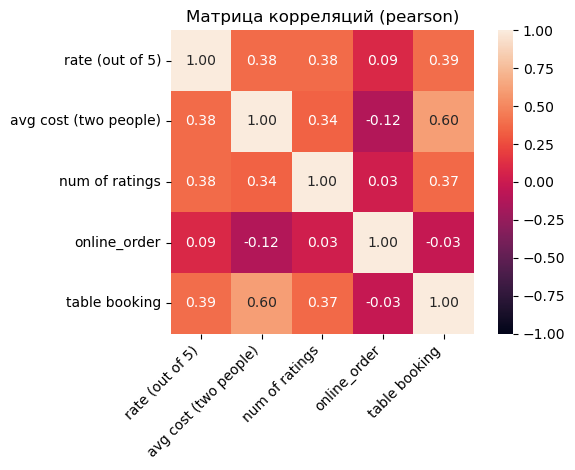

In [154]:
import seaborn as sns

corr = X.corr(numeric_only=True, method='pearson')  # или 'pearson'
ax = sns.heatmap(
    corr, vmin=-1, vmax=1,
    annot=True, fmt=".2f",
    square=True, cbar=True,
    mask=corr.isna(),  # если есть пропуски
)
ax.set_title("Матрица корреляций (pearson)")
plt.xticks(rotation=45, ha='right'); plt.yticks(rotation=0)
plt.tight_layout(); plt.show()

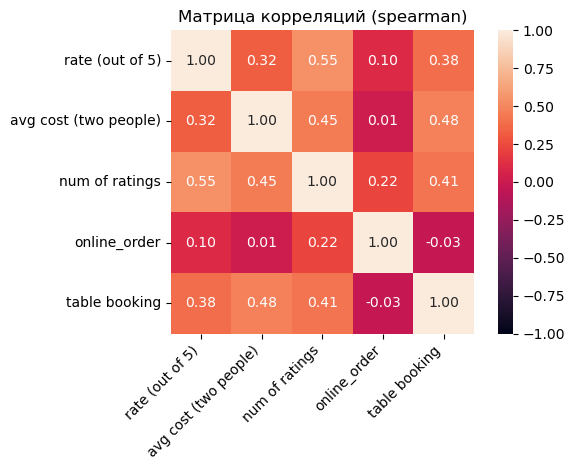

In [155]:
corr = X.corr(numeric_only=True, method='spearman')  # или 'pearson'
ax = sns.heatmap(
    corr, vmin=-1, vmax=1,
    annot=True, fmt=".2f",
    square=True, cbar=True,
    mask=corr.isna(),  # если есть пропуски
)
ax.set_title("Матрица корреляций (spearman)")
plt.xticks(rotation=45, ha='right'); plt.yticks(rotation=0)
plt.tight_layout(); plt.show()